## Exploring Datasets

This code explore the various datasets I'm using and their timeframes.

In [18]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import numpy as np
from windrose import WindroseAxes

In [19]:
data_path = Path.home()/'OneDrive'/'Kirstin'/'Uni'/'Year4'/'MSciProject'/'data_files'

### Manning Baselines

#### Mace Head, Ireland

In [20]:
files = (data_path / "manning_baselines").glob("MH*.txt")

combined_manning_df_MHD = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, skiprows=6, delim_whitespace=True)

    # Setting the index of the dataframe to be the extracted datetime and naming it time
    df.index = pd.to_datetime(df['YY'].astype(str) + "-" + \
                              df['MM'].astype(str) + "-" + \
                              df['DD'].astype(str) + " " + \
                              df['HH'].astype(str) + ":00:00")

    df.index.name = "time"

    combined_manning_df_MHD = pd.concat([combined_manning_df_MHD, df], ignore_index=False)

combined_manning_df_MHD = combined_manning_df_MHD.drop(['YY','MM','DD','HH','Index'], axis=1)

In [21]:
print(f"The data goes from {combined_manning_df_MHD.index.min()} to {combined_manning_df_MHD.index.max()}.")

The data goes from 1989-02-01 01:00:00 to 2023-12-31 23:00:00.


In [22]:
categories = []

for index, row in combined_manning_df_MHD.iterrows():
    Ct = row['Ct']

    if Ct <= 9:
        name = "mixed"
    elif Ct >= 10 and Ct <= 19:
        name = "baseline"
    elif Ct >= 20 and Ct <= 29:
        name = "local"
    elif Ct >= 30 and Ct <= 39:
        name = "southerly"
    elif Ct >= 40 and Ct <= 49:
        name = "polluted"
    elif Ct >= 60 and Ct <= 69:
        name = "upper troposphere"
    else:
        name = "else"

    categories.append(name)

#add list as a column
combined_manning_df_MHD["categories"] = categories

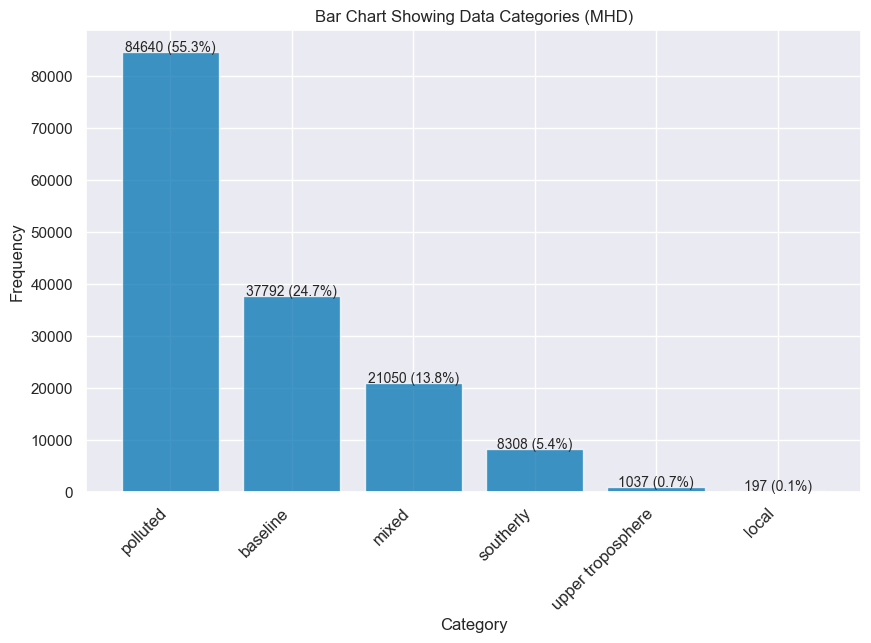

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set(style='darkgrid')
sns.set_palette("colorblind")

ax.bar(combined_manning_df_MHD['categories'].unique(), combined_manning_df_MHD['categories'].value_counts(), width=0.8, align='center', alpha=0.75)

# Adding data labels
total = len(combined_manning_df_MHD['categories'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height} ({height/total:.1%})',
            ha="center", fontsize=10)

ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
ax.set_title('Bar Chart Showing Data Categories (MHD)')

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

In [24]:
baseline = []

for index, row in combined_manning_df_MHD.iterrows():
    Ct = row['Ct']

    if Ct >= 10 and Ct <=19:
        label = 'Baseline'
    else:
        label = 'Not baseline'

    baseline.append(label)

#add list as a column
combined_manning_df_MHD["baseline"] = baseline

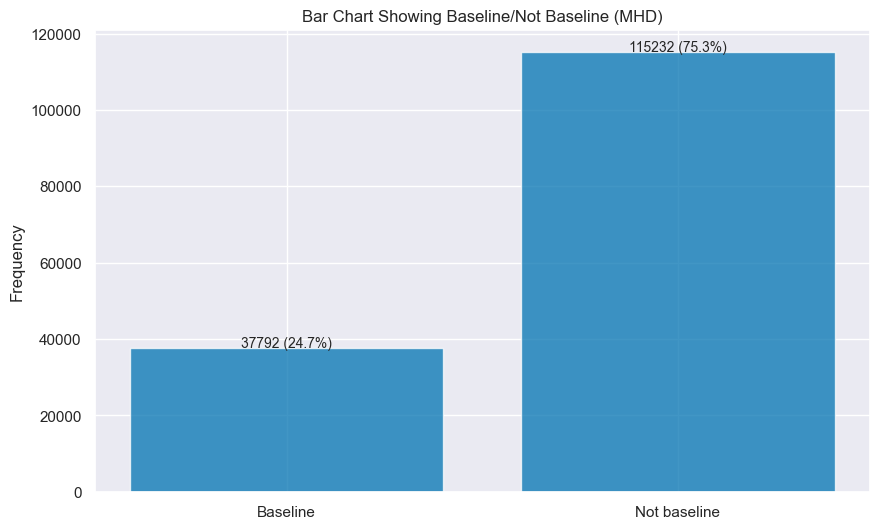

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style='darkgrid')
sns.set_palette("colorblind")

ax.bar(combined_manning_df_MHD['baseline'].unique()[::-1], combined_manning_df_MHD['baseline'].value_counts()[::-1], width=0.8, align='center', alpha=0.75)

total = len(combined_manning_df_MHD['baseline'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height} ({height/total:.1%})',
            ha="center", fontsize=10)

ax.set_ylabel('Frequency')
ax.set_title('Bar Chart Showing Baseline/Not Baseline (MHD)')
plt.show()

#### Gosan, South Korea

In [26]:
files = (data_path / "manning_baselines").glob("GS*.txt")

combined_manning_df_GSN = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, skiprows=6, delim_whitespace=True)

    # Setting the index of the dataframe to be the extracted datetime and naming it time
    df.index = pd.to_datetime(df['YY'].astype(str) + "-" + \
                              df['MM'].astype(str) + "-" + \
                              df['DD'].astype(str) + " " + \
                              df['HH'].astype(str) + ":00:00")

    df.index.name = "time"

    combined_manning_df_GSN = pd.concat([combined_manning_df_GSN, df], ignore_index=False)

combined_manning_df_GSN = combined_manning_df_GSN.drop(['YY','MM','DD','HH','Index'], axis=1)

In [27]:
print(f"The data goes from {combined_manning_df_GSN.index.min()} to {combined_manning_df_GSN.index.max()}.")

The data goes from 2007-11-12 01:00:00 to 2023-12-31 23:00:00.


In [28]:
categories = []

for index, row in combined_manning_df_GSN.iterrows():
    Ct = row['Ct']

    if Ct <= 9:
        name = "mixed"
    elif Ct >= 10 and Ct <= 19:
        name = "baseline"
    elif Ct >= 20 and Ct <= 29:
        name = "local"
    elif Ct >= 30 and Ct <= 39:
        name = "southerly"
    elif Ct >= 40 and Ct <= 49:
        name = "polluted"
    elif Ct >= 60 and Ct <= 69:
        name = "upper troposphere"
    else:
        name = "else"

    categories.append(name)

#add list as a column
combined_manning_df_GSN["categories"] = categories

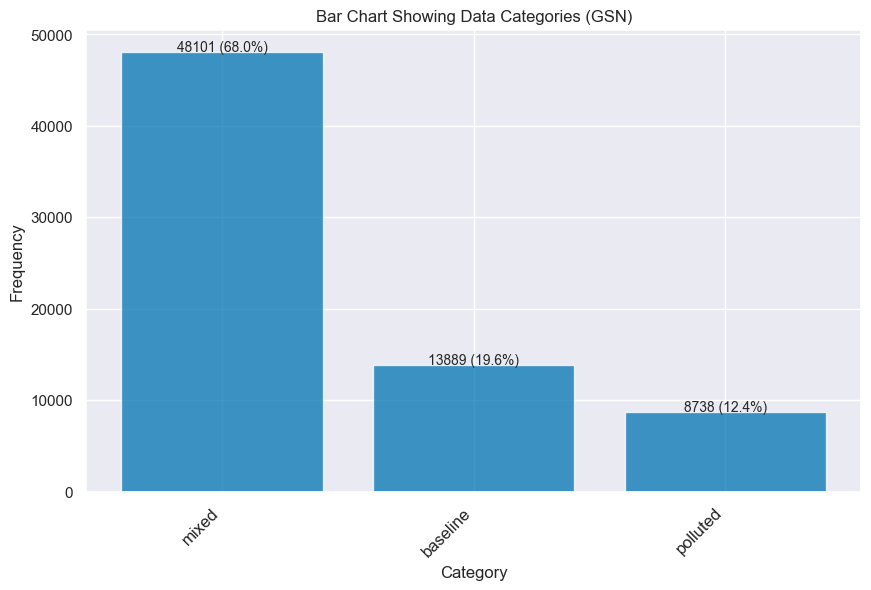

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set(style='darkgrid')
sns.set_palette("colorblind")

ax.bar(combined_manning_df_GSN['categories'].unique(), combined_manning_df_GSN['categories'].value_counts(), width=0.8, align='center', alpha=0.75)

# Adding data labels
total = len(combined_manning_df_GSN['categories'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height} ({height/total:.1%})',
            ha="center", fontsize=10)

ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
ax.set_title('Bar Chart Showing Data Categories (GSN)')

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

In [30]:
baseline = []

for index, row in combined_manning_df_GSN.iterrows():
    Ct = row['Ct']

    if Ct >= 10 and Ct <=19:
        label = 'Baseline'
    else:
        label = 'Not baseline'

    baseline.append(label)

#add list as a column
combined_manning_df_GSN["baseline"] = baseline

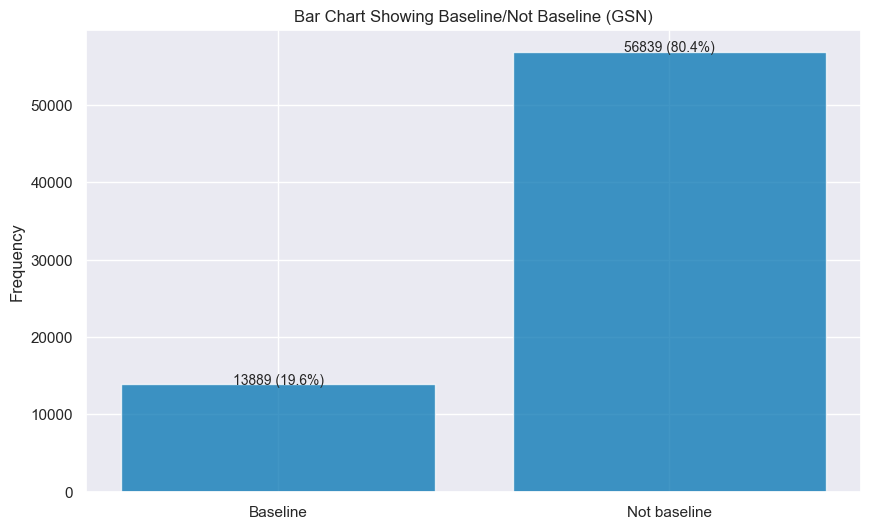

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style='darkgrid')
sns.set_palette("colorblind")

ax.bar(combined_manning_df_GSN['baseline'].unique()[::-1], combined_manning_df_GSN['baseline'].value_counts()[::-1], width=0.8, align='center', alpha=0.75)

total = len(combined_manning_df_GSN['baseline'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height} ({height/total:.1%})',
            ha="center", fontsize=10)

ax.set_ylabel('Frequency')
ax.set_title('Bar Chart Showing Baseline/Not Baseline (GSN)')
plt.show()

### ECMWF

In [32]:
MHD_10m = xr.open_mfdataset((data_path/'meteorological_data'/'ECMWF'/'MHD'/'10m_wind_grid').glob('*.nc'))
GS_10m = xr.open_mfdataset((data_path/'meteorological_data'/'ECMWF'/'GS'/'10m_wind_grid').glob('*.nc'))

MHD_850hPa = xr.open_mfdataset((data_path/'meteorological_data'/'ECMWF'/'MHD'/'850hPa_wind_grid').glob('*.nc'))
GS_850hPa = xr.open_mfdataset((data_path/'meteorological_data'/'ECMWF'/'GS'/'850hPa_wind_grid').glob('*.nc'))

MHD_500hPa = xr.open_mfdataset((data_path/'meteorological_data'/'ECMWF'/'MHD'/'500hPa_wind_grid').glob('*.nc'))
GS_500hPa = xr.open_mfdataset((data_path/'meteorological_data'/'ECMWF'/'GS'/'500hPa_wind_grid').glob('*.nc'))


#### Checking Coordinates

Text(0.02, 0.5, 'Latitude')

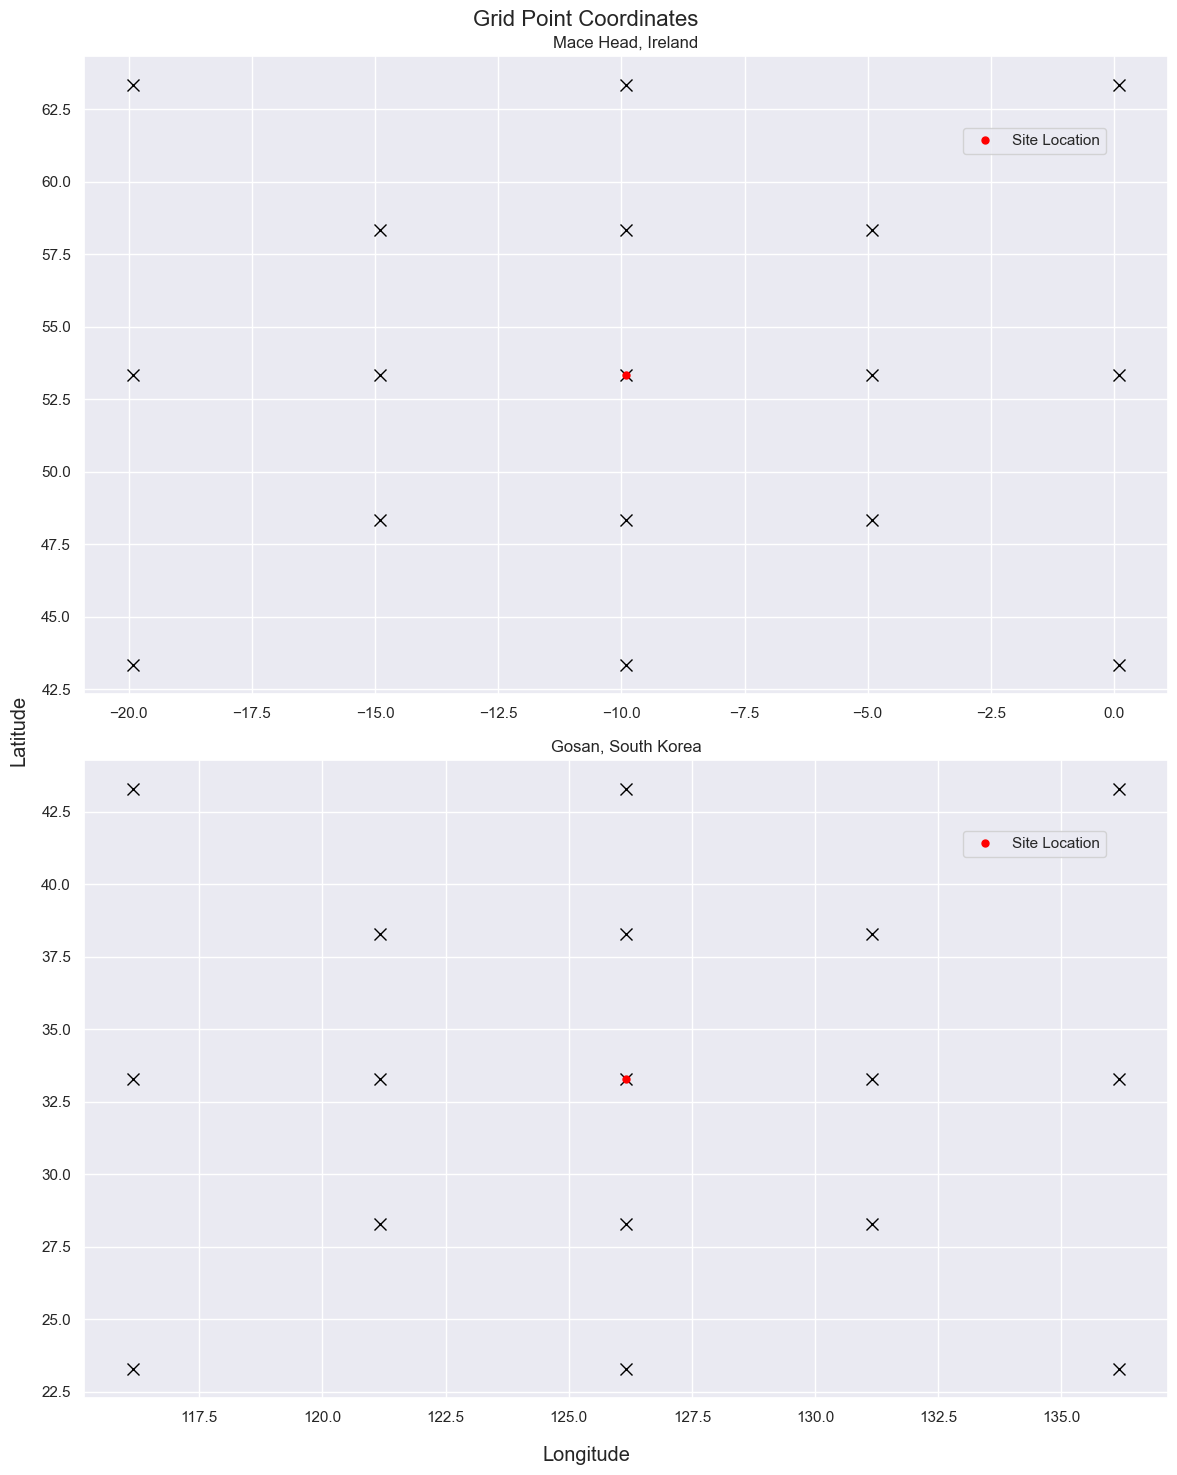

In [33]:
# checking latitudes and longitudes
assert MHD_10m.latitude.values.all() == MHD_850hPa.latitude.values.all() == MHD_500hPa.latitude.values.all()
assert MHD_10m.longitude.values.all() == MHD_850hPa.longitude.values.all() == MHD_500hPa.longitude.values.all()

assert GS_10m.latitude.values.all() == GS_850hPa.latitude.values.all() == GS_500hPa.latitude.values.all()
assert GS_10m.longitude.values.all() == GS_850hPa.longitude.values.all() == GS_500hPa.longitude.values.all()


# plotting the coordinates
fig, ax = plt.subplots(2,1, figsize=(12, 15))
sns.set(style='darkgrid')
sns.set_palette("colorblind")

MHD_coords = [53.3267, -9.9046]
GS_coords = [33.2924, 126.1616]

ax[0].plot(MHD_10m.longitude.values, MHD_10m.latitude.values, 'x', color='black', markersize=8)
ax[0].set_title('Mace Head, Ireland')

ax[0].plot(MHD_coords[1], MHD_coords[0], 'o', color='red', markersize=5, label="Site Location")
ax[0].legend(bbox_to_anchor=(0.95, 0.9))


ax[1].plot(GS_10m.longitude.values, GS_10m.latitude.values, 'x', color='black', markersize=8)
ax[1].set_title('Gosan, South Korea')

ax[1].plot(GS_coords[1], GS_coords[0], 'o', color='red', markersize=5, label="Site Location")
ax[1].legend(bbox_to_anchor=(0.95, 0.9))


fig.set_tight_layout(True)
fig.suptitle('Grid Point Coordinates', fontsize=16)
fig.supxlabel('Longitude')
fig.supylabel('Latitude')


#### Comparing Heights

In [34]:
# change this to explore different points (0-16)
point = 0

# calculating wind speeds and directions for different levels
# MHD
# 10m
MHD_10m_u = MHD_10m.sel(points=point).u10
MHD_10m_v = MHD_10m.sel(points=point).v10

MHD_10m_speed = np.sqrt(MHD_10m_u**2 + MHD_10m_v**2)
MHD_10m_direction = (np.arctan2(MHD_10m_u, MHD_10m_v) * 180 / np.pi) + 180

# 850hPa
MHD_850hPa_u = MHD_850hPa.sel(points=point).u
MHD_850hPa_v = MHD_850hPa.sel(points=point).v

MHD_850hPa_speed = np.sqrt(MHD_850hPa_u**2 + MHD_850hPa_v**2)
MHD_850hPa_direction = (np.arctan2(MHD_850hPa_u, MHD_850hPa_v) * 180 / np.pi) + 180

# 500hPa
MHD_500hPa_u = MHD_500hPa.sel(points=point).u
MHD_500hPa_v = MHD_500hPa.sel(points=point).v

MHD_500hPa_speed = np.sqrt(MHD_500hPa_u**2 + MHD_500hPa_v**2)
MHD_500hPa_direction = (np.arctan2(MHD_500hPa_u, MHD_500hPa_v) * 180 / np.pi) + 180


# GS
# 10m
GS_10m_u = GS_10m.sel(points=point).u10
GS_10m_v = GS_10m.sel(points=point).v10

GS_10m_speed = np.sqrt(GS_10m_u**2 + GS_10m_v**2)
GS_10m_direction = (np.arctan2(GS_10m_u, GS_10m_v) * 180 / np.pi) + 180

# 850hPa
GS_850hPa_u = GS_850hPa.sel(points=point).u
GS_850hPa_v = GS_850hPa.sel(points=point).v

GS_850hPa_speed = np.sqrt(GS_850hPa_u**2 + GS_850hPa_v**2)
GS_850hPa_direction = (np.arctan2(GS_850hPa_u, GS_850hPa_v) * 180 / np.pi) + 180

# 500hPa
GS_500hPa_u = GS_500hPa.sel(points=point).u
GS_500hPa_v = GS_500hPa.sel(points=point).v

GS_500hPa_speed = np.sqrt(GS_500hPa_u**2 + GS_500hPa_v**2)
GS_500hPa_direction = (np.arctan2(GS_500hPa_u, GS_500hPa_v) * 180 / np.pi) + 180

Text(0.02, 0.5, 'Wind Speed (m/s)')

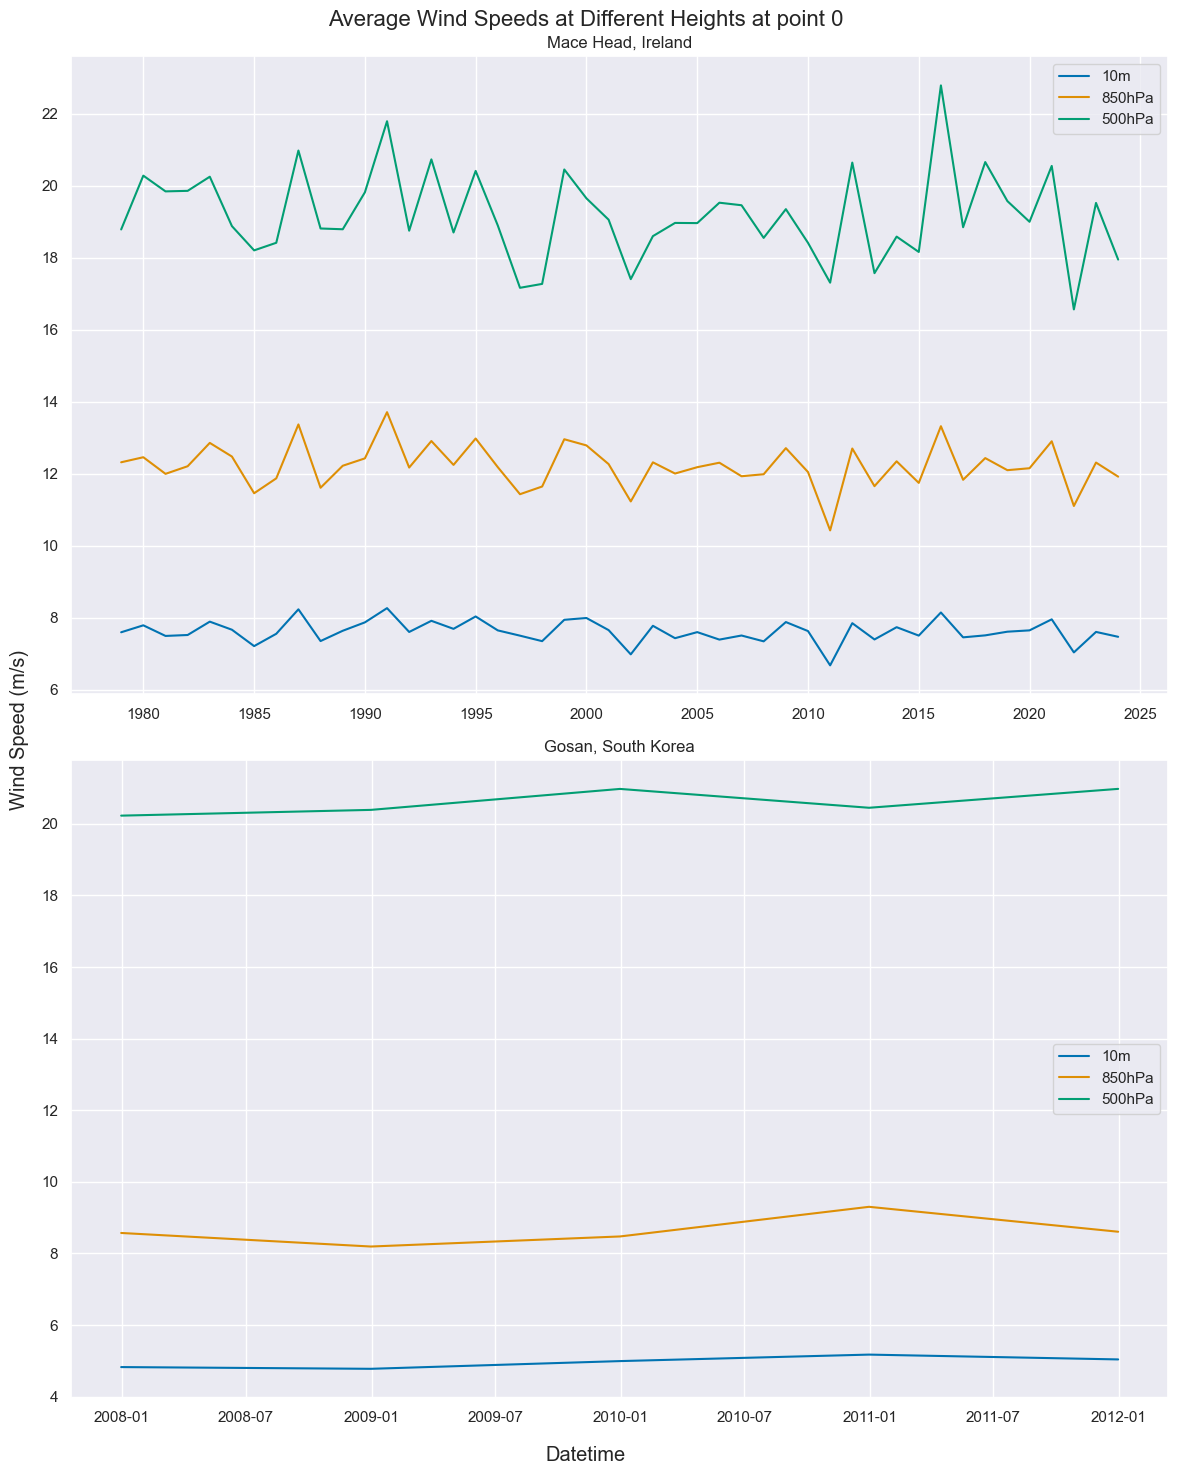

In [41]:
# comparing average wind speeds at different heights

# calculating yearly averages
MHD_10m_speed_yearly = MHD_10m_speed.resample(time='Y').mean()
MHD_850hPa_speed_yearly = MHD_850hPa_speed.resample(time='Y').mean()
MHD_500hPa_speed_yearly = MHD_500hPa_speed.resample(time='Y').mean()

GS_10m_speed_yearly = GS_10m_speed.resample(time='Y').mean()
GS_850hPa_speed_yearly = GS_850hPa_speed.resample(time='Y').mean()
GS_500hPa_speed_yearly = GS_500hPa_speed.resample(time='Y').mean()


fig, ax = plt.subplots(2,1, figsize=(12, 15))
sns.set(style='darkgrid')
sns.set_palette("colorblind")

ax[0].plot(MHD_10m_speed_yearly.time, MHD_10m_speed_yearly.values, label='10m')
ax[0].plot(MHD_850hPa_speed_yearly.time, MHD_850hPa_speed_yearly.values, label='850hPa')
ax[0].plot(MHD_500hPa_speed_yearly.time, MHD_500hPa_speed_yearly.values, label='500hPa')

ax[0].set_title('Mace Head, Ireland')
ax[0].legend()

ax[1].plot(GS_10m_speed_yearly.time, GS_10m_speed_yearly.values, label='10m')
ax[1].plot(GS_850hPa_speed_yearly.time, GS_850hPa_speed_yearly.values, label='850hPa')
ax[1].plot(GS_500hPa_speed_yearly.time, GS_500hPa_speed_yearly.values, label='500hPa')

ax[1].set_title('Gosan, South Korea')
ax[1].legend()

fig.set_tight_layout(True)
fig.suptitle(f'Average Wind Speeds at Different Heights at point {point}', fontsize=16)
fig.supxlabel('Datetime')
fig.supylabel('Wind Speed (m/s)')

Text(0.02, 0.5, 'Wind Direction (degrees)')

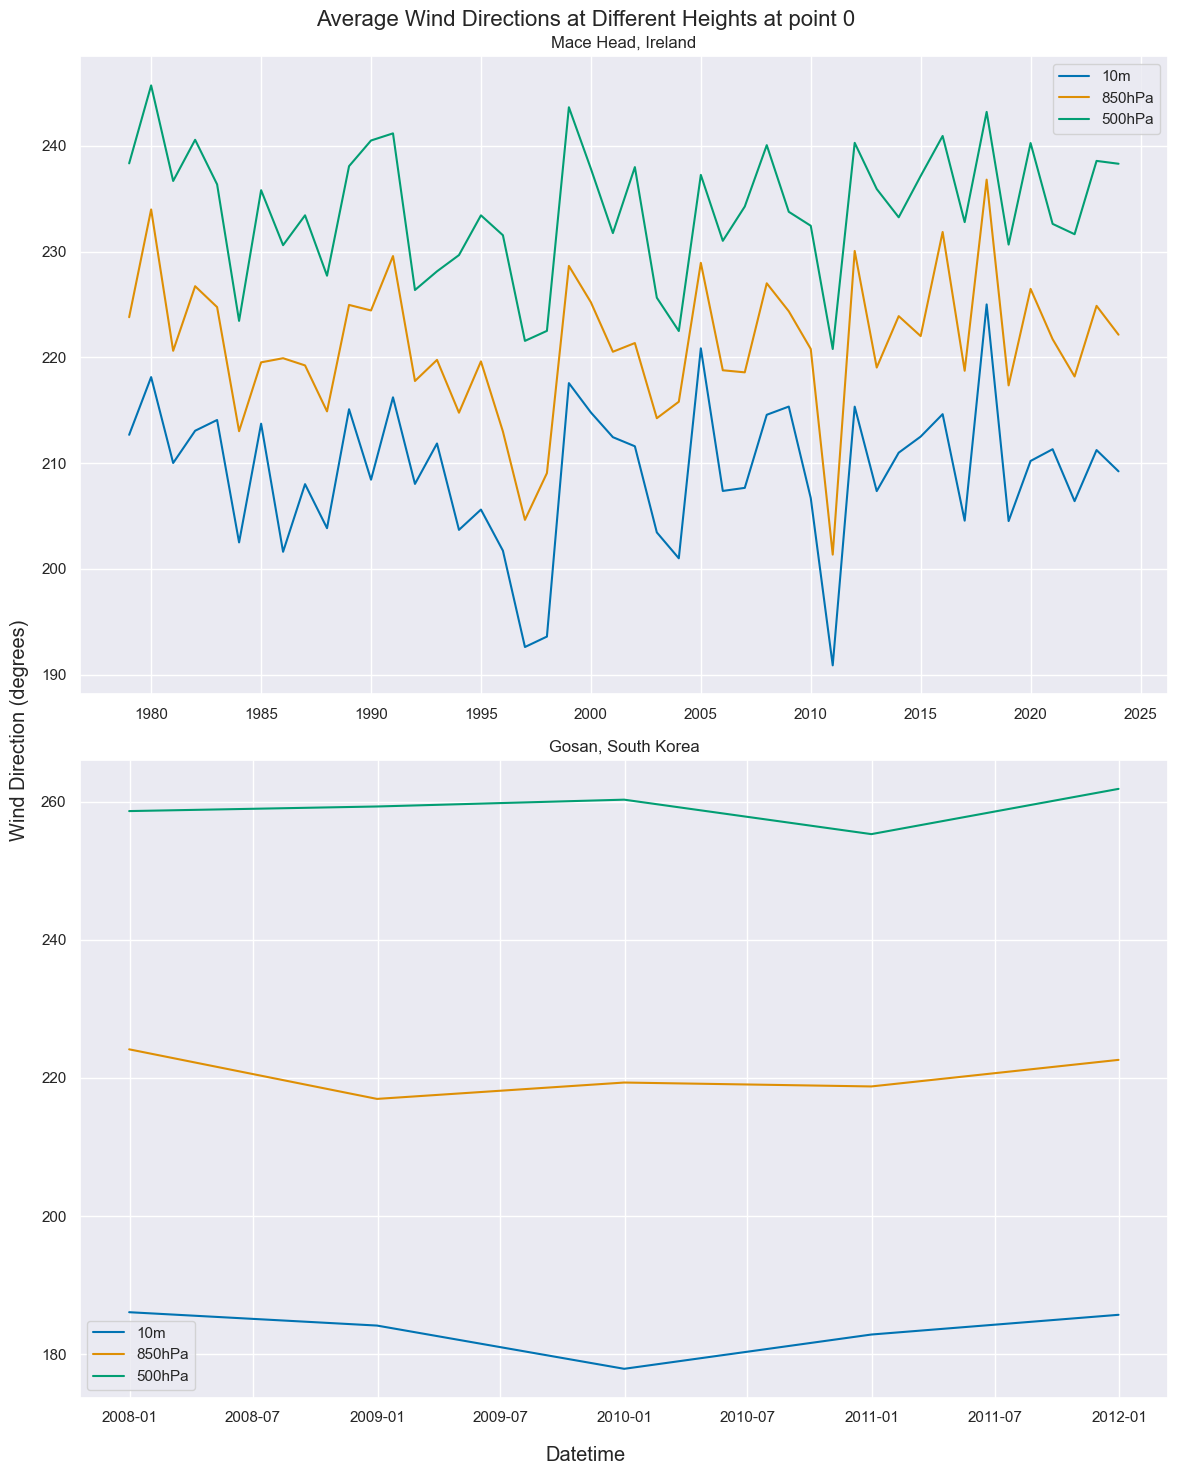

In [42]:
# comparing average wind directions at different heights

# calculating yearly averages
MHD_10m_direction_yearly = MHD_10m_direction.resample(time='Y').mean()
MHD_850hPa_direction_yearly = MHD_850hPa_direction.resample(time='Y').mean()
MHD_500hPa_direction_yearly = MHD_500hPa_direction.resample(time='Y').mean()

GS_10m_direction_yearly = GS_10m_direction.resample(time='Y').mean()
GS_850hPa_direction_yearly = GS_850hPa_direction.resample(time='Y').mean()
GS_500hPa_direction_yearly = GS_500hPa_direction.resample(time='Y').mean()


fig, ax = plt.subplots(2,1, figsize=(12, 15))
sns.set(style='darkgrid')
sns.set_palette("colorblind")

ax[0].plot(MHD_10m_direction_yearly.time, MHD_10m_direction_yearly.values, label='10m')
ax[0].plot(MHD_850hPa_direction_yearly.time, MHD_850hPa_direction_yearly.values, label='850hPa')
ax[0].plot(MHD_500hPa_direction_yearly.time, MHD_500hPa_direction_yearly.values, label='500hPa')

ax[0].set_title('Mace Head, Ireland')
ax[0].legend()

ax[1].plot(GS_10m_direction_yearly.time, GS_10m_direction_yearly.values, label='10m')
ax[1].plot(GS_850hPa_direction_yearly.time, GS_850hPa_direction_yearly.values, label='850hPa')
ax[1].plot(GS_500hPa_direction_yearly.time, GS_500hPa_direction_yearly.values, label='500hPa')

ax[1].set_title('Gosan, South Korea')
ax[1].legend()

fig.set_tight_layout(True)
fig.suptitle(f'Average Wind Directions at Different Heights at point {point}', fontsize=16)
fig.supxlabel('Datetime')
fig.supylabel('Wind Direction (degrees)')

Text(0.5, 1.0, 'Point 0 (MHD) - 500hPa')

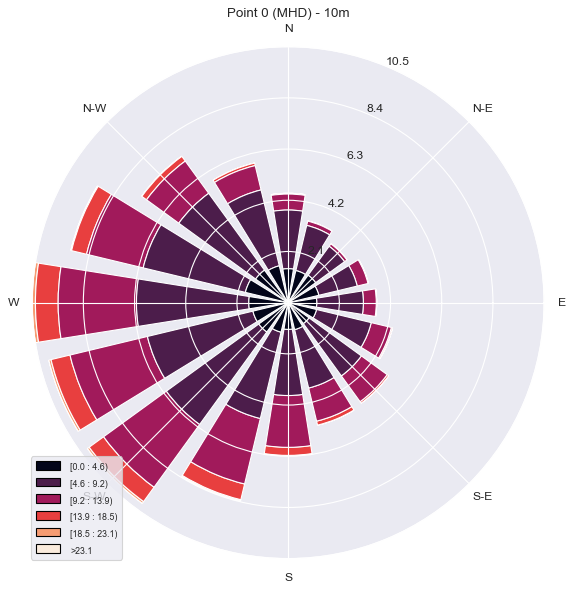

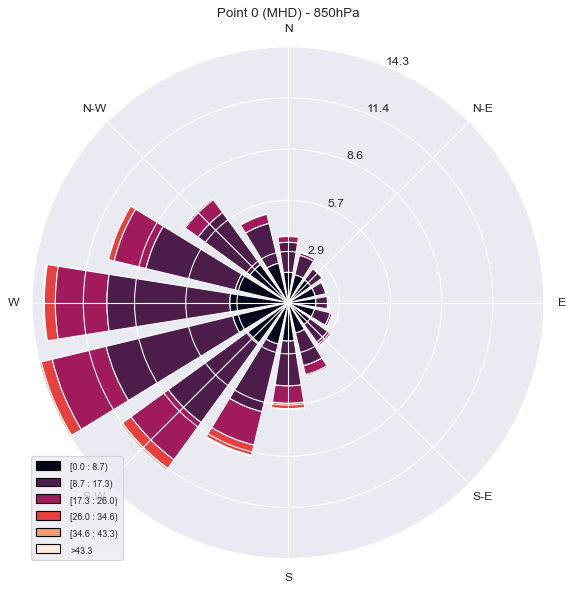

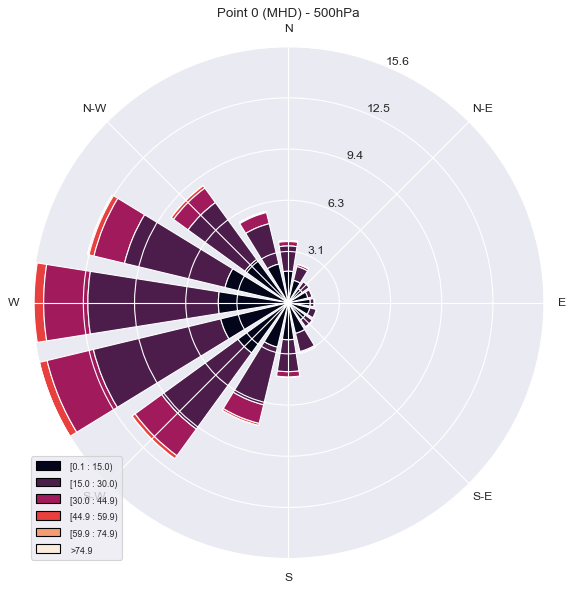

In [54]:
# plotting wind roses for different heights - MHD
sns.set(style='darkgrid')
sns.set_palette("colorblind")


# filtering to only include data from 2010 onwards
MHD_10m_speed = MHD_10m_speed.sel(time=slice('2010-01-01', '2020-12-31'))
MHD_10m_direction = MHD_10m_direction.sel(time=slice('2010-01-01', '2020-12-31'))

MHD_850hPa_speed = MHD_850hPa_speed.sel(time=slice('2010-01-01', '2020-12-31'))
MHD_850hPa_direction = MHD_850hPa_direction.sel(time=slice('2010-01-01', '2020-12-31'))

MHD_500hPa_speed = MHD_500hPa_speed.sel(time=slice('2010-01-01', '2020-12-31'))
MHD_500hPa_direction = MHD_500hPa_direction.sel(time=slice('2010-01-01', '2020-12-31'))

# MHD
# 10m
ax = WindroseAxes.from_ax()
ax.bar(MHD_10m_direction.values, MHD_10m_speed.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (MHD) - 10m')

# 850hPa
ax = WindroseAxes.from_ax()
ax.bar(MHD_850hPa_direction.values, MHD_850hPa_speed.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (MHD) - 850hPa')

# 500hPa
ax = WindroseAxes.from_ax()
ax.bar(MHD_500hPa_direction.values, MHD_500hPa_speed.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (MHD) - 500hPa')

Text(0.5, 1.0, 'Point 0 (GS) - 500hPa')

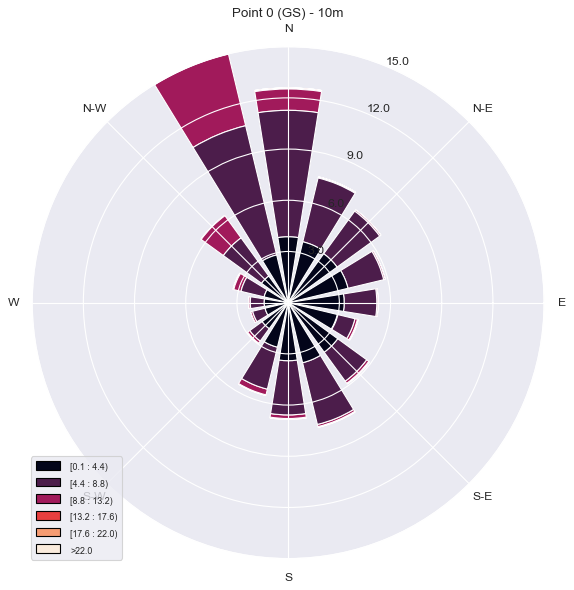

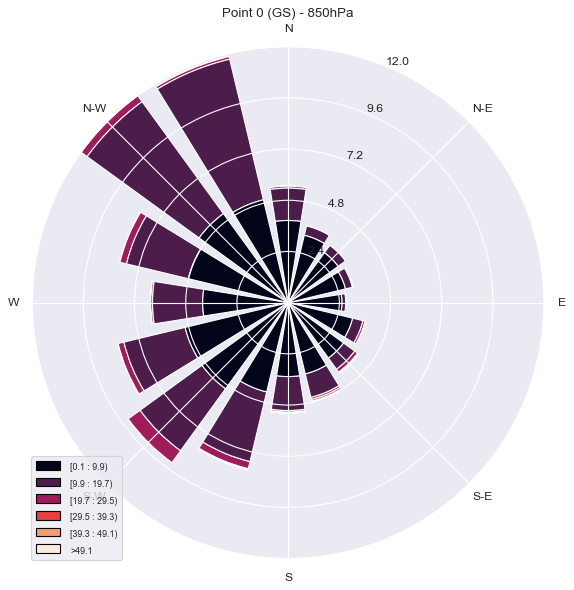

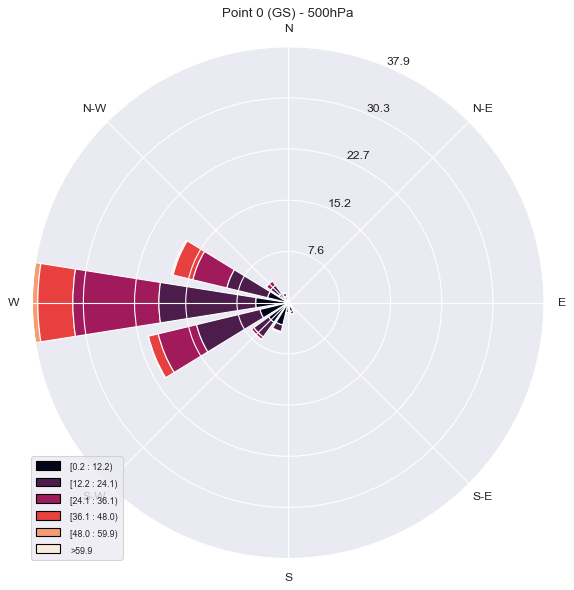

In [55]:
# plotting wind roses for different heights - GS
sns.set(style='darkgrid')
sns.set_palette("colorblind")

# filtering to only include data from 2010 onwards
GS_10m_speed = GS_10m_speed.sel(time=slice('2010-01-01', '2020-12-31'))
GS_10m_direction = GS_10m_direction.sel(time=slice('2010-01-01', '2020-12-31'))

GS_850hPa_speed = GS_850hPa_speed.sel(time=slice('2010-01-01', '2020-12-31'))
GS_850hPa_direction = GS_850hPa_direction.sel(time=slice('2010-01-01', '2020-12-31'))

GS_500hPa_speed = GS_500hPa_speed.sel(time=slice('2010-01-01', '2020-12-31'))
GS_500hPa_direction = GS_500hPa_direction.sel(time=slice('2010-01-01', '2020-12-31'))

# 10m
ax = WindroseAxes.from_ax()
ax.bar(GS_10m_direction.values, GS_10m_speed.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (GS) - 10m')

# 850hPa
ax = WindroseAxes.from_ax()
ax.bar(GS_850hPa_direction.values, GS_850hPa_speed.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (GS) - 850hPa')

# 500hPa
ax = WindroseAxes.from_ax()
ax.bar(GS_500hPa_direction.values, GS_500hPa_speed.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (GS) - 500hPa')

Text(0.5, 1.0, 'Point 0 (GS) - 500hPa - Summer')

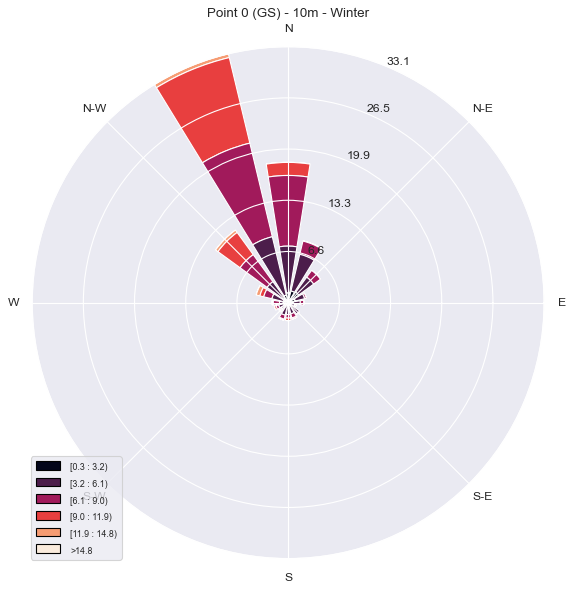

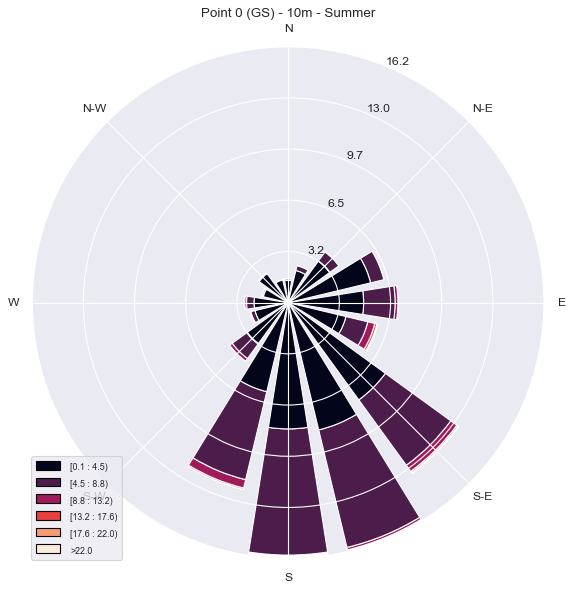

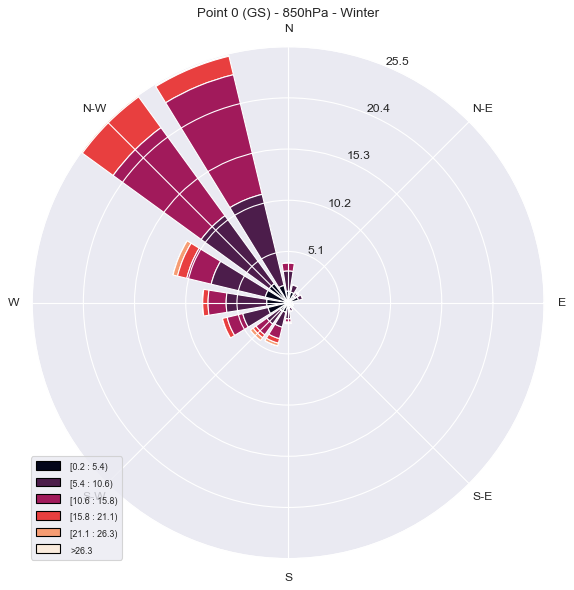

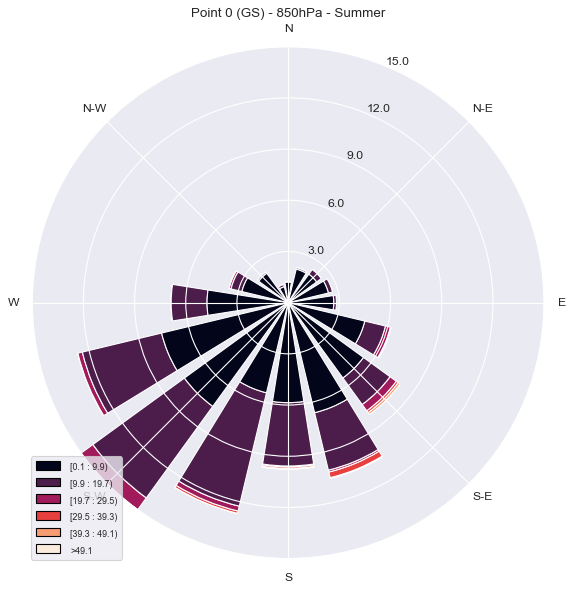

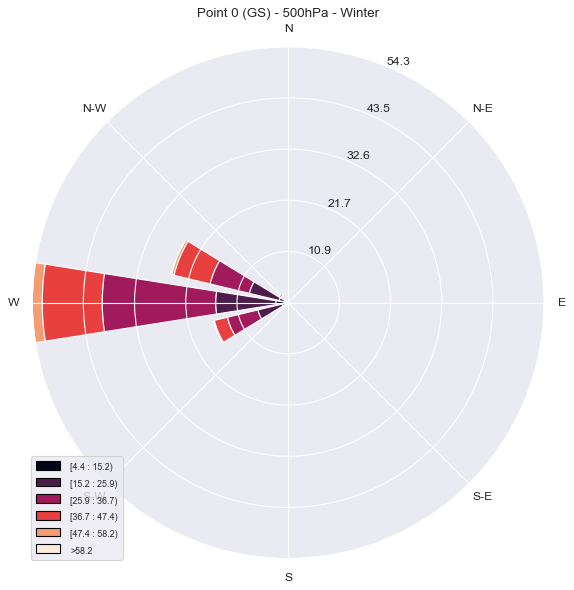

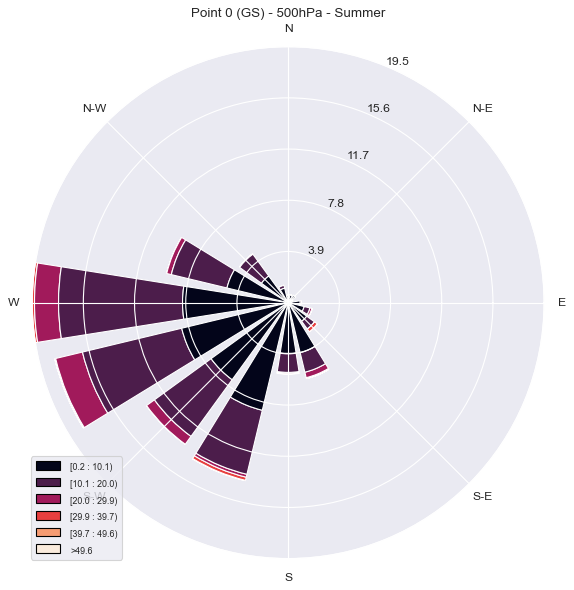

In [58]:
# wind roses for GS, splitting by season (winter and summer)
# there is expected to be a difference between the two seasons as the monsoon system affects the wind direction and speed
# winter months - December, January, February
GS_10m_speed_winter = GS_10m_speed.sel(time=GS_10m_speed['time.season']=='DJF')
GS_10m_direction_winter = GS_10m_direction.sel(time=GS_10m_direction['time.season']=='DJF')

GS_850hPa_speed_winter = GS_850hPa_speed.sel(time=GS_850hPa_speed['time.season']=='DJF')
GS_850hPa_direction_winter = GS_850hPa_direction.sel(time=GS_850hPa_direction['time.season']=='DJF')

GS_500hPa_speed_winter = GS_500hPa_speed.sel(time=GS_500hPa_speed['time.season']=='DJF')
GS_500hPa_direction_winter = GS_500hPa_direction.sel(time=GS_500hPa_direction['time.season']=='DJF')

# summer months - June, July, August
GS_10m_speed_summer = GS_10m_speed.sel(time=GS_10m_speed['time.season']=='JJA')
GS_10m_direction_summer = GS_10m_direction.sel(time=GS_10m_direction['time.season']=='JJA')

GS_850hPa_speed_summer = GS_850hPa_speed.sel(time=GS_850hPa_speed['time.season']=='JJA')
GS_850hPa_direction_summer = GS_850hPa_direction.sel(time=GS_850hPa_direction['time.season']=='JJA')

GS_500hPa_speed_summer = GS_500hPa_speed.sel(time=GS_500hPa_speed['time.season']=='JJA')
GS_500hPa_direction_summer = GS_500hPa_direction.sel(time=GS_500hPa_direction['time.season']=='JJA')

# 10m
ax = WindroseAxes.from_ax()
ax.bar(GS_10m_direction_winter.values, GS_10m_speed_winter.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (GS) - 10m - Winter')

ax = WindroseAxes.from_ax()
ax.bar(GS_10m_direction_summer.values, GS_10m_speed_summer.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (GS) - 10m - Summer')


# 850hPa
ax = WindroseAxes.from_ax()
ax.bar(GS_850hPa_direction_winter.values, GS_850hPa_speed_winter.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (GS) - 850hPa - Winter')

ax = WindroseAxes.from_ax()
ax.bar(GS_850hPa_direction_summer.values, GS_850hPa_speed_summer.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (GS) - 850hPa - Summer')


# 500hPa
ax = WindroseAxes.from_ax()
ax.bar(GS_500hPa_direction_winter.values, GS_500hPa_speed_winter.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (GS) - 500hPa - Winter')

ax = WindroseAxes.from_ax()
ax.bar(GS_500hPa_direction_summer.values, GS_500hPa_speed_summer.values, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(f'Point {point} (GS) - 500hPa - Summer')


### AGAGE

In [79]:
# MHD
hfc134a_MHD_ds = xr.open_dataset(data_path/'AGAGE'/'AGAGE-public-files'/'hfc-134a'/'AGAGE-combined_MHD_hfc-134a.nc')
hfc152a_MHD_ds = xr.open_dataset(data_path/'AGAGE'/'AGAGE-public-files'/'hfc-152a'/'AGAGE-combined_MHD_hfc-152a.nc')
n2o_MHD_ds = xr.open_dataset(data_path/'AGAGE'/'AGAGE-public-files'/'n2o'/'AGAGE-combined_MHD_n2o.nc')

# GSN
hfc134a_GSN_ds = xr.open_dataset(data_path/'AGAGE'/'AGAGE-public-files'/'hfc-134a'/'AGAGE-GCMS-Medusa_GSN_hfc-134a.nc')
hfc152a_GSN_ds= xr.open_dataset(data_path/'AGAGE'/'AGAGE-public-files'/'hfc-152a'/'AGAGE-GCMS-MEDUSA_GSN_hfc-152a.nc')

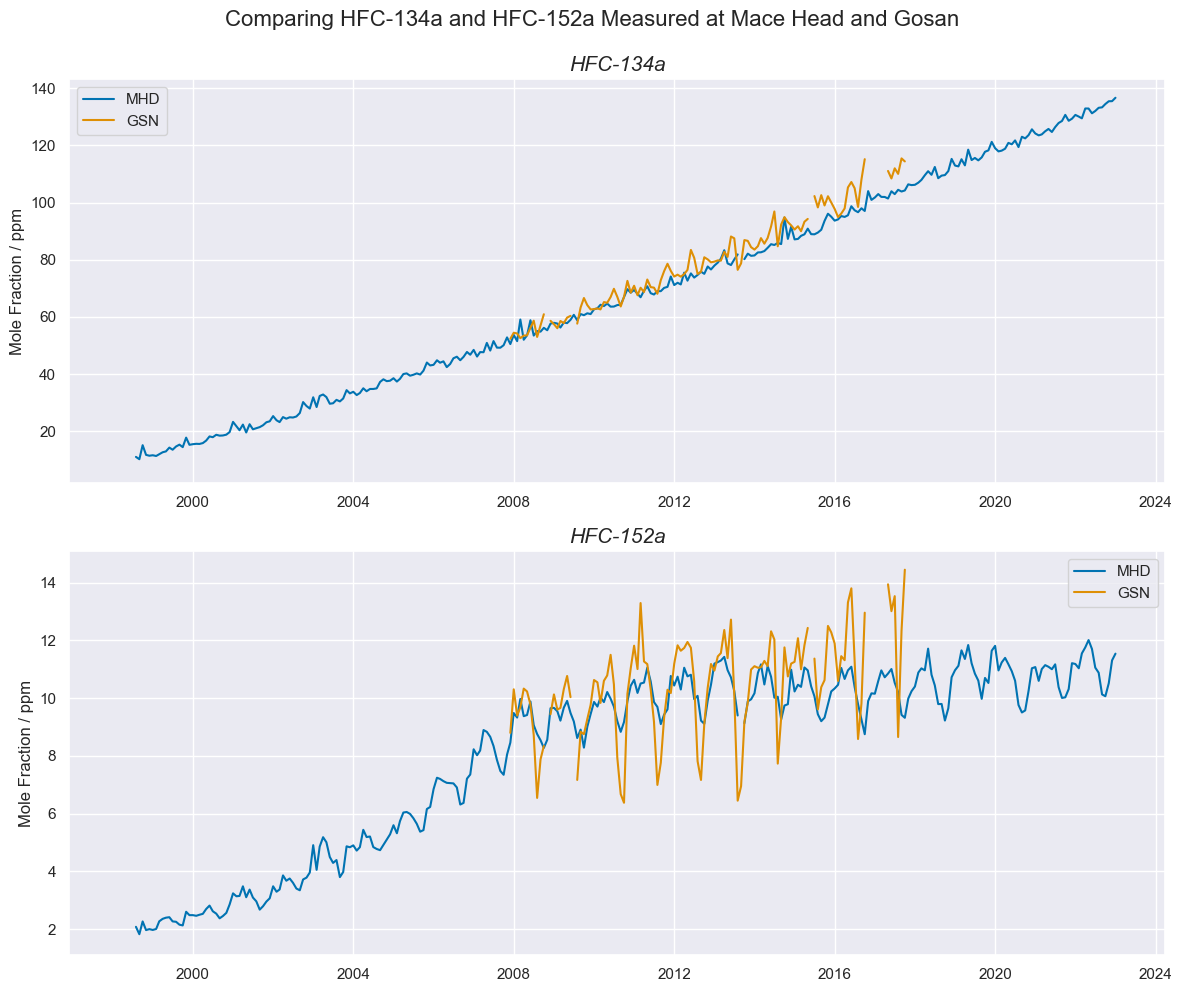

In [80]:
# comparing MHD and GSN
hfc134a_MHD = hfc134a_MHD_ds['mf'].to_dataframe()
hfc152a_MHD = hfc152a_MHD_ds['mf'].to_dataframe()
hfc134a_GSN = hfc134a_GSN_ds['mf'].to_dataframe()
hfc152a_GSN = hfc152a_GSN_ds['mf'].to_dataframe()

hfc134a_MHD_monthly = hfc134a_MHD.resample('M').mean()
hfc152a_MHD_monthly = hfc152a_MHD.resample('M').mean()
hfc134a_GSN_monthly = hfc134a_GSN.resample('M').mean()
hfc152a_GSN_monthly = hfc152a_GSN.resample('M').mean()


fig, axs = plt.subplots(2,1, figsize=(12, 10))

axs[0].plot(hfc134a_MHD_monthly.index, hfc134a_MHD_monthly['mf'], label='MHD')
axs[0].plot(hfc134a_GSN_monthly.index, hfc134a_GSN_monthly['mf'], label='GSN')
axs[0].set_title("HFC-134a",fontsize=15, fontstyle='italic')
axs[0].set_ylabel("Mole Fraction / ppm")
axs[0].legend()

axs[1].plot(hfc152a_MHD_monthly.index, hfc152a_MHD_monthly['mf'], label='MHD')
axs[1].plot(hfc152a_GSN_monthly.index, hfc152a_GSN_monthly['mf'], label='GSN')
axs[1].set_title("HFC-152a",fontsize=15, fontstyle='italic')
axs[1].set_ylabel("Mole Fraction / ppm")
axs[1].legend()

fig.suptitle("Comparing HFC-134a and HFC-152a Measured at Mace Head and Gosan", fontsize=16, y=0.99)
fig.tight_layout()

### Comparing Datetime

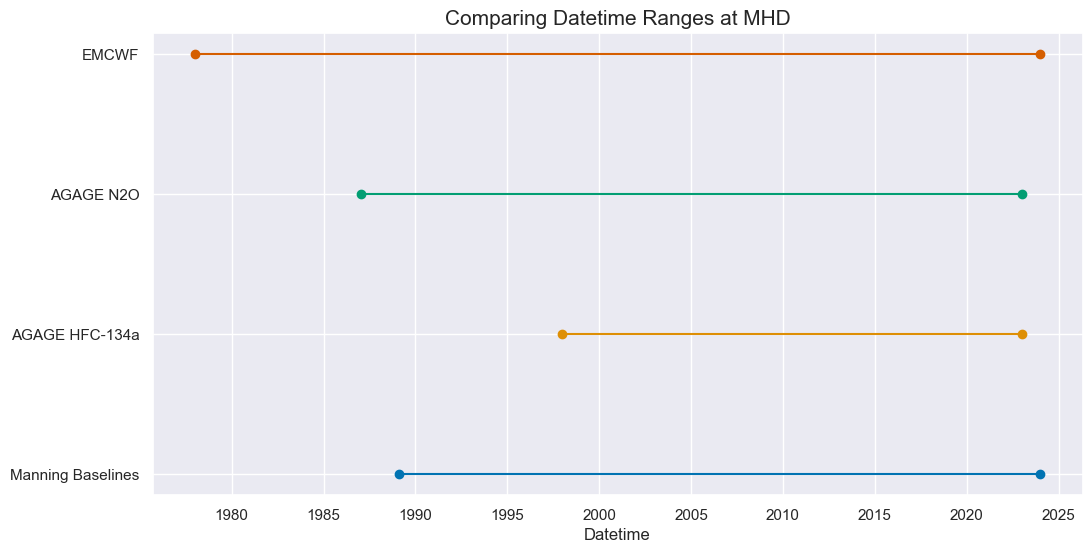

In [115]:
hfc134a_df = hfc134a_MHD_ds.to_dataframe()
n2o_df = n2o_MHD_ds.to_dataframe()
MHD_10m_df = MHD_10m['time'].to_dataframe()

datasets = [combined_manning_df_MHD, hfc134a_df, n2o_df, MHD_10m_df]
names = ['Manning Baselines', 'AGAGE HFC-134a', 'AGAGE N2O', 'EMCWF']


plt.figure(figsize=(12, 6))

# plotting lines for each dataset
for i, dataset in enumerate(datasets):
    plt.plot([dataset.index.min(), dataset.index.max()], [i, i], label=names[i], marker='o')

plt.yticks(range(len(datasets)), names)
plt.xlabel('Datetime')
plt.title('Comparing Datetime Ranges at MHD', fontsize=15)
plt.show()


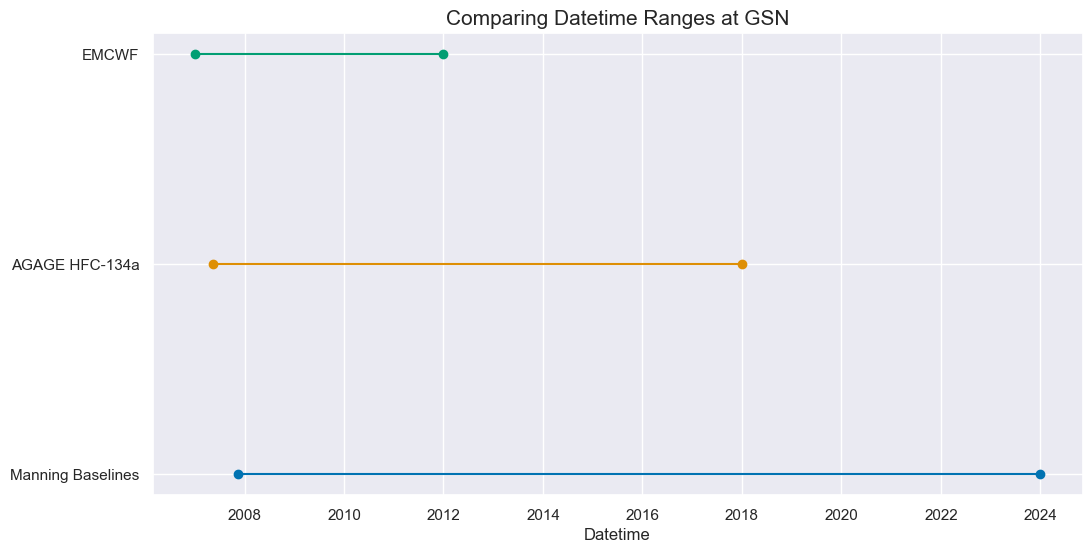

In [116]:
hfc134a_df = hfc134a_GSN_ds.to_dataframe()
GS_10m_df = GS_10m['time'].to_dataframe()

datasets = [combined_manning_df_GSN, hfc134a_df, GS_10m_df]
names = ['Manning Baselines', 'AGAGE HFC-134a', 'EMCWF']


plt.figure(figsize=(12, 6))

# plotting lines for each dataset
for i, dataset in enumerate(datasets):
    plt.plot([dataset.index.min(), dataset.index.max()], [i, i], label=names[i], marker='o')

plt.yticks(range(len(datasets)), names)
plt.xlabel('Datetime')
plt.title('Comparing Datetime Ranges at GSN', fontsize=15)
plt.show()